# Ансамблеве навчання

Ансамблеве навчання — техніка машинного навчання, що використовує кілька навчених алгоритмів з метою отримати кращу передбачальну ефективність, ніж можна отримати від кожного алгоритму окремо. На відміну від статистичного ансамблю в статистичній механіці, який зазвичай нескінченний, ансамбль моделей у машинному навчанні складається з конкретної скінченної множини альтернативних моделей, але зазвичай дозволяє існувати істотно гнучкішим структурам.

## Дерева прийняття рішень (Decision trees)

Алгоритм дерева прийняття рішень використовується для класифікації або регресії.
Його ідея — розділяти простір ознак на підмножини так, щоб отримати групи об’єктів, максимально однорідні за цільовою змінною.

Дерево прийняття рішень — це ієрархічна структура, де:
- вузол (node) містить умову розділення (наприклад, $x_{i} < t$)
- гілки (branches) — це варіанти переходу (так/ні);
- листки (leaves) — фінальні рішення (клас або числове значення)

Маємо навчальну вибірку:

$$
{(x_i, y_i)}_{i=1}^n, \quad x_i \in \mathbb{R}^d, ; y_i \in {1, 2, \dots, K}
$$

Мета — знайти функцію $ f(x) $, яка розбиває простір ознак на області $ R_m $, і кожній області відповідає передбачення класу:

$$
f(x) = \sum_{m=1}^{M} c_m \cdot I(x \in R_m)
$$

де:

* $ R_m $ — регіон (листок дерева);
* $c_m $ — значення або клас, який передбачається для цього регіону;
* $ I(\cdot) $ — індикаторна функція (1, якщо умова виконується).

На кожному кроці вибирається ознака $ x_j $ та поріг $ t $, які найкраще поділяють дані на дві частини:

$$
R_1(j, t) = {x \mid x_j \le t}, \quad R_2(j, t) = {x \mid x_j > t}
$$

Ми вибираємо такі $j, t$, що мінімізують певну функцію втрат $L$.

![graph](../resources/ml-ens-1.png)

Accuracy on test set: 0.9298245614035088


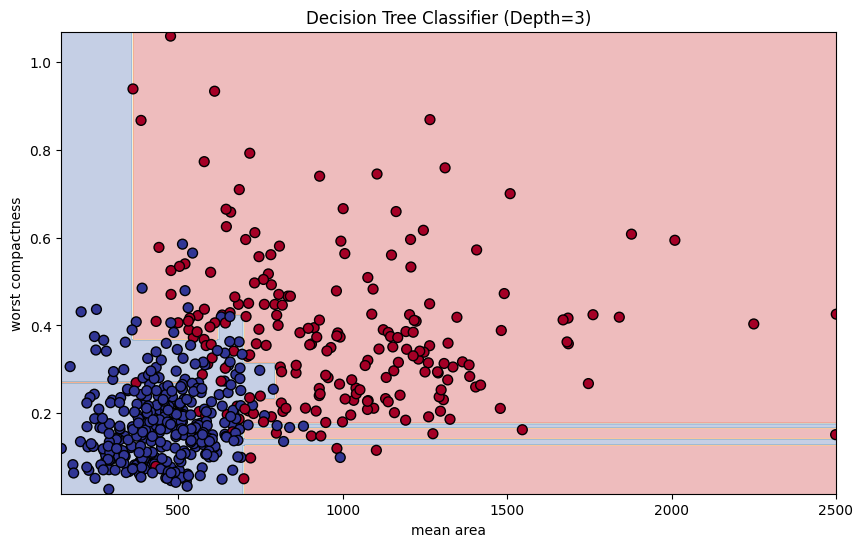

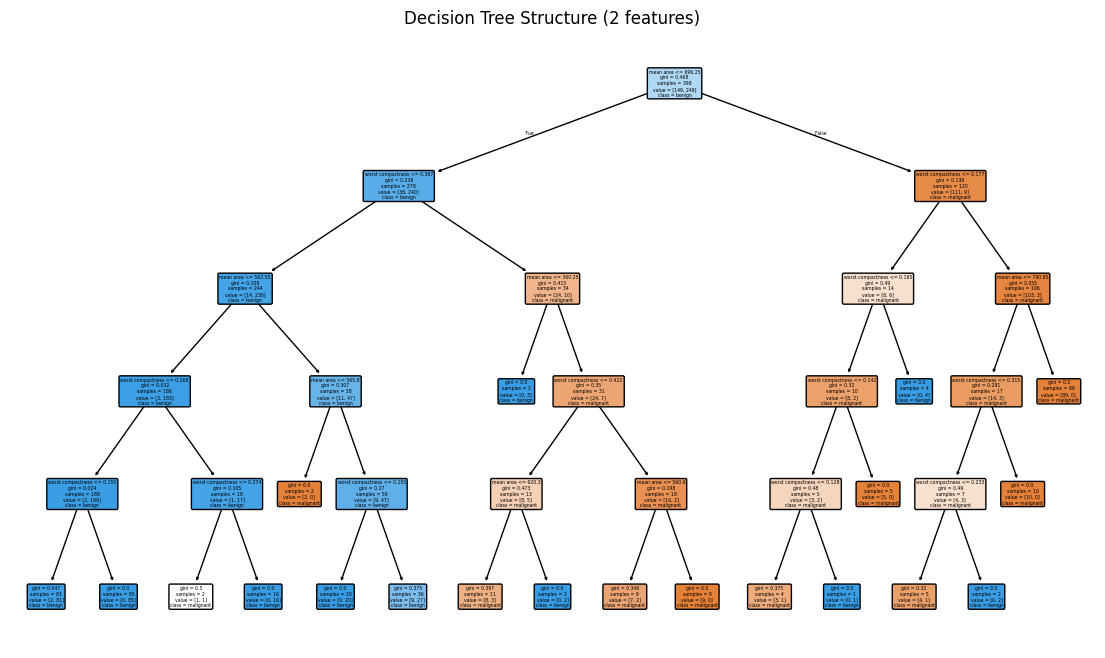

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split

# Load dataset
data = load_breast_cancer()

# Select only 2 features: index 3 and 25
X = data.data[:, [3, 25]]
y = data.target

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train decision tree
clf = DecisionTreeClassifier(max_depth=5, criterion='gini', random_state=42)
clf.fit(X_train, y_train)

# Print accuracy
print("Accuracy on test set:", clf.score(X_test, y_test))

# Plot decision boundaries
x_min, x_max = X[:, 0].min() - 0.01, X[:, 0].max() + 0.01
y_min, y_max = X[:, 1].min() - 0.01, X[:, 1].max() + 0.01
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                     np.linspace(y_min, y_max, 300))

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.RdYlBu)
scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu, edgecolor='k', s=50)

plt.xlabel(data.feature_names[3])
plt.ylabel(data.feature_names[25])
plt.title("Decision Tree Classifier (Depth=3)")
# plt.legend(handles=scatter.legend_elements()[0], labels=data.target_names)
plt.show()

# Plot tree structure
plt.figure(figsize=(14, 8))
plot_tree(clf, feature_names=[data.feature_names[3], data.feature_names[25]],
          class_names=data.target_names, filled=True, rounded=True)
plt.title("Decision Tree Structure (2 features)")
plt.show()


## Випадковий ліс (Random Forets)

Випадковий ліс — це ансамблевий метод класифікації або регресії, який об’єднує велику кількість дерев рішень, кожне з яких навчається на випадковій підмножині даних і ознак.
Ідея полягає в тому, щоб зменшити переобучення (overfitting), властиве окремим деревам, і отримати більш стабільну та точну модель.


Нехай маємо навчальну вибірку:
$$
D = {(x_i, y_i)}_{i=1}^{N}, \quad x_i \in \mathbb{R}^m, ; y_i \in {1, 2, \dots, K}
$$

Алгоритм випадкового лісу створює $ T $ незалежних дерев рішень:

$$
\text{RandomForest} = { h_1(x), h_2(x), \dots, h_T(x) }
$$

Після побудови всіх дерев $ h_t(x) $, прогноз робиться голосуванням (для класифікації):

$$
\hat{y} = \text{mode}{ h_1(x), h_2(x), \dots, h_T(x) }
$$

або усередненням (для регресії):

$$
\hat{y} = \frac{1}{T} \sum_{t=1}^{T} h_t(x)
$$

![graph](../resources/ml-ens-2.webp)

Accuracy: 0.9415204678362573


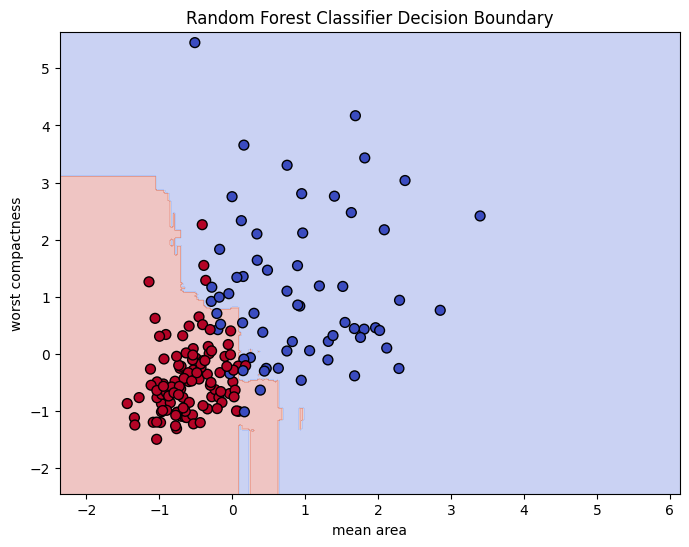

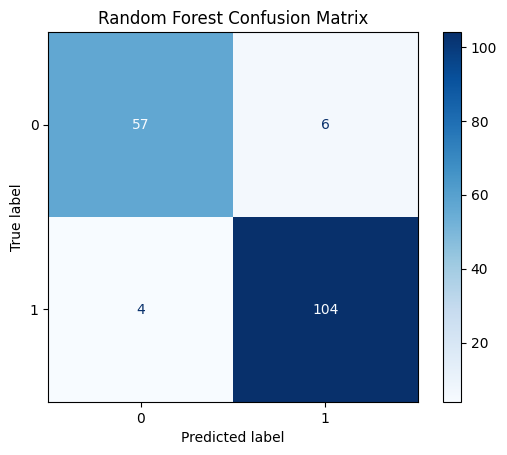

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score

# Load dataset
data = load_breast_cancer()
X = data.data[:, [3, 25]]  # e.g., mean smoothness and worst concave points
y = data.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Scale features (optional, but helps with visualization consistency)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Random Forest
clf = RandomForestClassifier(
    n_estimators=100, max_depth=5, random_state=42
)
clf.fit(X_train_scaled, y_train)

# Evaluate model
y_pred = clf.predict(X_test_scaled)
print("Accuracy:", accuracy_score(y_test, y_pred))

# Decision boundary visualization
x_min, x_max = X_train_scaled[:, 0].min() - 1, X_train_scaled[:, 0].max() + 1
y_min, y_max = X_train_scaled[:, 1].min() - 1, X_train_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(
    np.linspace(x_min, x_max, 300),
    np.linspace(y_min, y_max, 300)
)

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
plt.scatter(X_test_scaled[:, 0], X_test_scaled[:, 1],
            c=y_test, cmap='coolwarm', edgecolors='k', s=50)
plt.xlabel(data.feature_names[3])
plt.ylabel(data.feature_names[25])
plt.title("Random Forest Classifier Decision Boundary")
plt.show()

# Confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='Blues')
plt.title("Random Forest Confusion Matrix")
plt.show()


## XGBoost

c:\Users\vmelnyk2\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:10:52] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Accuracy: 0.935672514619883


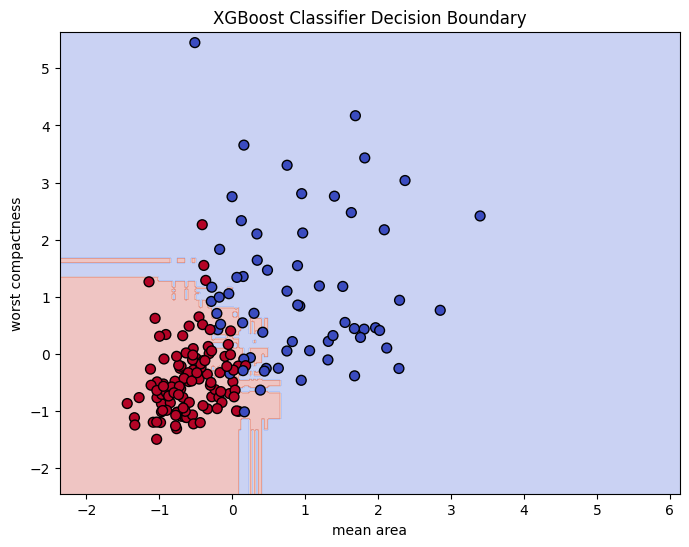

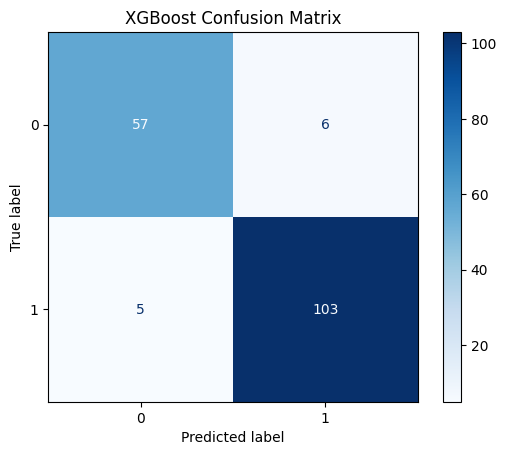

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score
from xgboost import XGBClassifier

# Load dataset
data = load_breast_cancer()
X = data.data[:, [3, 25]]  # mean smoothness, worst concave points
y = data.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Scale data for better numerical stability
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train XGBoost classifier
clf = XGBClassifier(
    n_estimators=200,
    max_depth=4,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)
clf.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred = clf.predict(X_test_scaled)
print("Accuracy:", accuracy_score(y_test, y_pred))

# Decision boundary visualization
x_min, x_max = X_train_scaled[:, 0].min() - 1, X_train_scaled[:, 0].max() + 1
y_min, y_max = X_train_scaled[:, 1].min() - 1, X_train_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(
    np.linspace(x_min, x_max, 300),
    np.linspace(y_min, y_max, 300)
)

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
plt.scatter(X_test_scaled[:, 0], X_test_scaled[:, 1],
            c=y_test, cmap='coolwarm', edgecolors='k', s=50)
plt.xlabel(data.feature_names[3])
plt.ylabel(data.feature_names[25])
plt.title("XGBoost Classifier Decision Boundary")
plt.show()

# Confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='Blues')
plt.title("XGBoost Confusion Matrix")
plt.show()


## Компроміс зсуву та дисперсії (Bias–variance tradeoff)

Мета будь-якої моделі машинного навчання — знайти закономірність у даних, щоб робити точні передбачення.
Однак модель може:

- бути занадто простою (недонавченою, underfitting)
- або занадто складною (перенавченою, overfitting)

Цей баланс описує компроміс між зсувом і дисперсією.

| Компонента               | Формула                                                                          | Пояснення                                                                                                   |
| ------------------------ | -------------------------------------------------------------------------------- | ----------------------------------------------------------------------------------------------------------- |
| **Зсув (Bias)**          | $\text{Bias}[\hat{f}(x)] = \mathbb{E}[\hat{f}(x)] - f(x) $                      | Наскільки “в середньому” модель відхиляється від істинної залежності. Великий зсув → модель занадто проста. |
| **Дисперсія (Variance)** | $ \text{Var}[\hat{f}(x)] = \mathbb{E}[(\hat{f}(x) - \mathbb{E}[\hat{f}(x)])^2] $ | Наскільки модель “чутлива” до зміни навчальних даних. Велика дисперсія → модель перенавчається.             |
| **Невідворотний шум**    | $ \sigma^2 = \text{Var}(\varepsilon) $                                          | Частина похибки, яку неможливо усунути, бо вона спричинена випадковими факторами в даних.                   |

Мета навчання — знайти модель, у якій Bias² + Variance мінімальні (шум ми не контролюємо).

Bagging (RF) - зменшує дисперсію (variance), Boosting (XGBoost) - зменшує зсув (bias).

![graph](../resources/ml-ens-3.png)
